# NUMERICAL DIFFERENTIATION 
#### Pedro Arrizon

##  1.) **Finite Differences**

The definition of a derivative given $f(x)$ is:                                                            

(5.1)
$
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h} \\~\\ 
$

If we were to implement **Taylor's Theorem** to this definition we are able to get this as well:

##### **TWO-POINT FORWARD DIFFERENCE FORMULA** 

(5.2)
$
f'(x) =\frac{f(x+h) - f(x)}{h} - \frac{h}{2}f''(c)\\~\\
$

*where c is between x and x + h* $\\~\\$
*and f(x) is twice continuously differentiable.*


For a finite calculation it is impossible to take the limit in equation 5.1 but if we examine equation (5.2) we can see that if we approximate h to be really small then:

(5.3)
$
f'(x) \approx \frac{f(x+h) - f(x)}{h} \\~\\ 
$

We then are able to treat the last term in equation (5.2) as an error term. The Two point forward difference formula is a first-order approximation method for getting the first derivative. 

##### **THREE-POINT CENTERED DIFFERENCE FORMULA** 

(5.4)
$
f'(x) =\frac{f(x+h) - f(x-h)}{2h} - \frac{h^2}{6}f'''(c)\\~\\
$

*where $(x-h) < c < (x+h)$*


##### **THREE-POINT CENTERED DIFFERENCE FORMULA FOR THE SECOND DERIVATIVE** 

(5.5)
$
f''(x) =\frac{f(x-h) - 2f(x) + f(x+h)}{h^2} - \frac{h^2}{12}f^{(iv)}(c)\\~\\
$

*where $(x-h) < c < (x+h)$*

##  2.) **Rounding Error**

One of the biggest issues when approximating derivatives is that we are subtracting nearly equal numbers. 
We can look at the example below:

,h,f'(x),Error
0,1.0e-01,-0.250627,-2.96890839487508539918e+00
1,1.0e-02,-0.250006,-2.96828807861529897494e+00
2,1.0e-03,-0.250000,-2.96828189095906047612e+00
3,1.0e-04,-0.250000,-2.96828182908404514251e+00
4,1.0e-05,-0.250000,-2.96828182846529520234e+00
5,1.0e-06,-0.250000,-2.96828182845910770737e+00
6,1.0e-07,-0.250000,-2.96828182845904553488e+00
7,1.0e-08,-0.250000,-2.96828182845904509080e+00
8,1.0e-09,-0.250000,-2.96828182845904509080e+00
9,1.0e-10,-0.250000,-2.96828182845904509080e+00


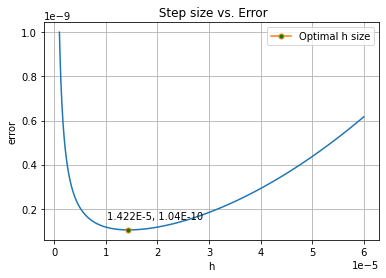

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

def f(x):                      # here we define our function
        y = math.e**x
        return y

def three_point_centered(x,h):
    y = -1/((1+x+h)*(1+x-h))
    return y

def fe(h):                      # here we define our function's error
    y = h**2/6 + 10**-15/h
    return y

def cp2():
    step_sizes = [10**-i for i in range(1,13)]
    actual = math.e**1
    estimate = [three_point_centered(1,h) for h in step_sizes]
    error = ["{:.20e}".format(est - actual) for est in estimate]
    step_sizes_e = ["{:.1e}".format(10**-i) for i in range(1,13)]
    table = pd.DataFrame(step_sizes_e, columns= ["h"])
    table['f\'(x)'] = estimate
    table['Error'] = error

    x_range = np.arange(0.000001, 0.00006, 0.00000005)
    y_vals = [fe(h) for h in x_range]
    plt.plot(x_range,y_vals)
    plt.plot(1.422E-5, 1.04E-10, marker="o", markersize=5, markerfacecolor="green", label = 'Optimal h size'); plt.text(1.022E-5, 1.54E-10, '1.422E-5, 1.04E-10')
    plt.xlabel("h"); plt.ylabel("error") ; plt.title(" Step size vs. Error"); plt.legend()
    plt.grid()

    display(table)

cp2()
